/Users/harshpathak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in double_scalars


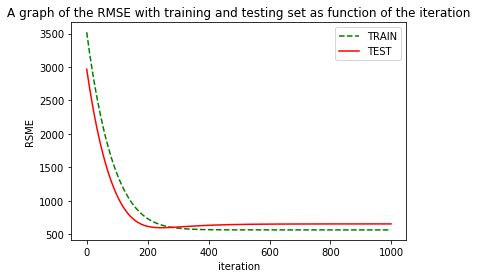

Final RMSE testing error 653.7078535814501
theta [[3343.13149985]
 [1036.56766269]
 [-295.65400871]]


In [3]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

def plotgraph(it,rte,rtr):
    plt.title('A graph of the RMSE with training and testing set as function of the iteration') 
    plt.xlabel('iteration')
    plt.ylabel('RSME')
  
    plt.plot(it, rtr,color='green',linestyle='dashed',label = "TRAIN")
    plt.plot(it, rte,color='red',linestyle='solid',label = "TEST")

    plt.legend()
    plt.show()
#extracting data from csv file
data = np.genfromtxt('./x06Simple.csv',delimiter=',',dtype="int16",skip_header=1,usecols=(1,2,3))
theta=[]
np.random.seed(0)
np.random.shuffle(data)
#train, test = train_test_split(data, test_size=0.33)
train_pct_index = int((2/3) * len(data))
train,test = data[:train_pct_index], data[train_pct_index:]

trainy=train[:, 2:]
trainx=train[:, :2]
testy=test[:, 2:]
testx=test[:, :2]
mean= np.mean(trainx, axis=0)
std = np.std(trainx, axis=0, ddof=1)
trainxStd = (trainx-mean)/std
testxStd = (testx-mean)/std
trainxStd = np.hstack([np.ones([trainxStd.shape[0],1]), trainxStd])
N=len(trainxStd)
testxStd = np.hstack([np.ones([testxStd.shape[0],1]), testxStd])
itr=0
pr=1
xt=trainxStd.transpose()
learningRate=0.01

learningRate=learningRate
rte=[]
rtr=[]
it=[]
for i in range(3):
    theta.append(random.uniform(-1,1))
RSMEtrain0=0    
theta=np.array(theta).reshape(3,1)
#While the termination criteria hasn't been met
while(itr<1000 and pr>2**-23):
    mid=np.dot(trainxStd,theta)-trainy
    gradient=(np.dot(xt,mid))
    #computing batch gradient
    batchGradient=(learningRate*gradient)/N
    theta=theta-batchGradient
    it.append(itr)
    itr=itr+1
    LengthOfFishTest=np.dot(testxStd,theta)
    LengthOfFishTrain=np.dot(trainxStd,theta)
    #Compute the RMSE of the testing error
    RSMEtest=np.sqrt(np.mean((testy-LengthOfFishTest)**2)) 
    rte.append(RSMEtest)
    #Compute the RMSE of the training data
    RSMEtrain1=np.sqrt(np.mean((trainy-LengthOfFishTrain)**2)) 
    rtr.append(RSMEtrain1)
    changeInTrainingError=np.abs(RSMEtrain1-RSMEtrain0)
    percentChange =(changeInTrainingError/RSMEtrain0)*100
    RSMEtrain0=RSMEtrain1
    LengthOfFishTest1=np.dot(testxStd,theta)
plotgraph(it,rte,rtr)
#Compute the RMSE of the testing data    
RSMEtest1=np.sqrt(np.mean((testy-LengthOfFishTest1)**2)) 
print("Final RMSE testing error",RSMEtest1)
print("theta",theta)
